In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib import font_manager

In [2]:
font_path = "C:/Windows/Fonts/Arial.ttf"
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 문제 해결


In [3]:
# Read raw data
conditions = []
with open('qt_conditions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        conditions.append(line)
    file.close()

species = []
with open('qt_species_list.txt','r') as file:
    i = 0
    for line in file:        
        line = line.strip()
        if i < 9:
            line = line[2:]
        else:
            line = line[3:]
        species.append(line)
        i += 1
    file.close()

reactions = []
with open('qt_reactions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        reactions.append(line)
    file.close()

df_cd = pd.read_csv('qt_conditions.txt', sep=r'\s+', header=0, names=['Time [s]']+conditions)
df_sp = pd.read_csv('qt_densities.txt', sep=r'\s+', header=0, names=['Time [s]']+species)
df_rx = pd.read_csv('qt_rates.txt', sep=r'\s+', header=0, names=['Time [s]']+reactions)

In [4]:
rdf_sp = df_sp.copy()

In [5]:
CH4 = (df_sp['CH4'] + df_sp['CH4(V13)'] + df_sp['CH4(V24)'])/const.N_A*16
C2H6 = (df_sp['C2H6'] + df_sp['C2H6(V13)'] + df_sp['C2H6(V24)'])/const.N_A*30
C2H4 = (df_sp['C2H4'] + df_sp['C2H4(V1)'] + df_sp['C2H4(V2)'])/const.N_A*28
C2H2 = (df_sp['C2H2'] + df_sp['C2H2(V13)'] + df_sp['C2H2(V2)'] + df_sp['C2H2(V5)'])/const.N_A*26
C3H8 = (df_sp['C3H8'] + df_sp['C3H8(V1)'] + df_sp['C3H8(V2)'])/const.N_A*44
C3H6 = (df_sp['C3H6'] + df_sp['C3H6(V)'])/const.N_A*42
C2H = df_sp['C2H']/const.N_A*25
CH = df_sp['CH']/const.N_A*13
C3H7 = df_sp['C3H7']/const.N_A*43
C3H5 = df_sp['C3H5']/const.N_A*41
CH3 = df_sp['CH3']/const.N_A*15
CH2 = df_sp['CH2']/const.N_A*14
C2H3 = df_sp['C2H3']/const.N_A*27
C4H9 = df_sp['C4H9']/const.N_A*57
C2H5 = df_sp['C2H5']/const.N_A*29
C3H4 = df_sp['C3H4']/const.N_A*40
C5H12 = df_sp['C5H12']/const.N_A*72
C4H10 = df_sp['C4H9H']/const.N_A*58

del_CH4 = CH4.iloc[0] - CH4.iloc[-1]
CH4_conv_cal = del_CH4/CH4.iloc[0] * 100
total_CH = C2H6.iloc[-1] + C2H4.iloc[-1] + C2H2.iloc[-1] + C3H8.iloc[-1] + C3H6.iloc[-1] + C2H.iloc[-1] + CH.iloc[-1] + C3H7.iloc[-1] + C3H5.iloc[-1] + CH3.iloc[-1] + CH2.iloc[-1] + C2H3.iloc[-1] + C4H9.iloc[-1] + C2H5.iloc[-1] + C3H4.iloc[-1] + C5H12.iloc[-1] + C4H10.iloc[-1]
C2H6_sel_cal = C2H6.iloc[-1]/total_CH * 100
C2H4_sel_cal = C2H4.iloc[-1]/total_CH * 100
C2H2_sel_cal = C2H2.iloc[-1]/total_CH * 100
C3H8_sel_cal = C3H8.iloc[-1]/total_CH * 100
C3H6_sel_cal = C3H6.iloc[-1]/total_CH * 100
C2H_sel_cal = C2H.iloc[-1]/total_CH * 100
CH_sel_cal = CH.iloc[-1]/total_CH * 100
C3H7_sel_cal = C3H7.iloc[-1]/total_CH * 100
C3H5_sel_cal = C3H5.iloc[-1]/total_CH * 100
CH3_sel_cal = CH3.iloc[-1]/total_CH * 100
CH2_sel_cal = CH2.iloc[-1]/total_CH * 100
C2H3_sel_cal = C2H3.iloc[-1]/total_CH * 100
C4H9_sel_cal = C4H9.iloc[-1]/total_CH * 100
C2H5_sel_cal = C2H5.iloc[-1]/total_CH * 100
C3H4_sel_cal = C3H4.iloc[-1]/total_CH * 100
C5H12_sel_cal = C5H12.iloc[-1]/total_CH * 100
C4H10_sel_cal = C4H10.iloc[-1]/total_CH * 100

16.751626016260158


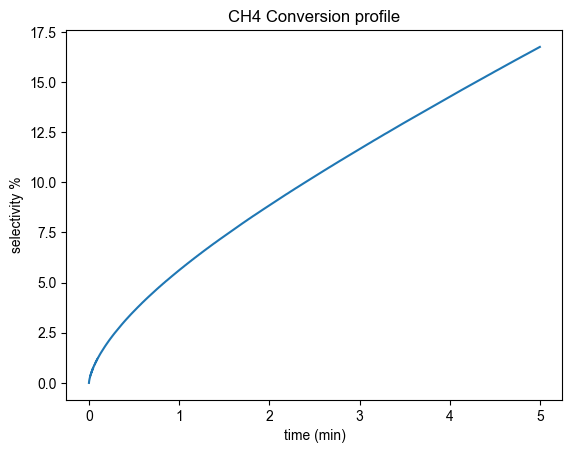

In [6]:
plt.plot(df_sp['Time [s]'], (CH4.iloc[0] - CH4)/CH4.iloc[0]*100)
plt.title('CH4 Conversion profile')
plt.ylabel('selectivity %')
plt.xlabel('time (min)')
print((CH4.iloc[0] - CH4.iloc[-1])/CH4.iloc[0]*100)

In [8]:

print(3/2*df_cd['Electron temperature [K]'].iloc[-1] / const.e * const.k)
print(df_cd['Current density [A/cm2]'].iloc[-1])

9.089563124910734
1.2736e-05


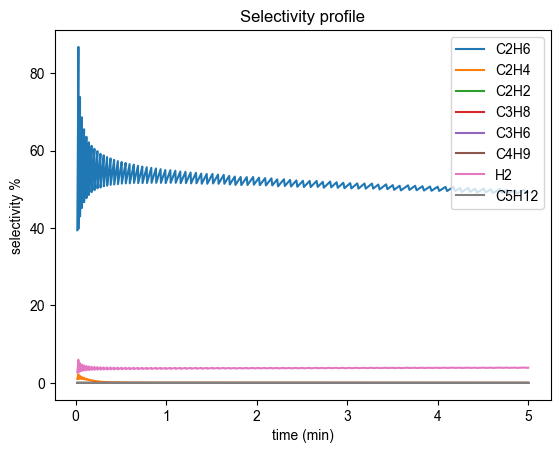

In [12]:
a = 200
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_C2H6.iloc[a:], label='C2H6')
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_C2H4.iloc[a:], label='C2H4')
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_C2H2.iloc[a:], label='C2H2')
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_C3H8.iloc[a:], label='C3H8')
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_C3H6.iloc[a:], label='C3H6')
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_C4H9.iloc[a:], label='C4H9')
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_H2.iloc[a:], label='H2')
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_C5H12.iloc[a:], label='C5H12')
plt.title('Selectivity profile')
plt.ylabel('selectivity %')
plt.xlabel('time (min)')
plt.legend()
plt.show()

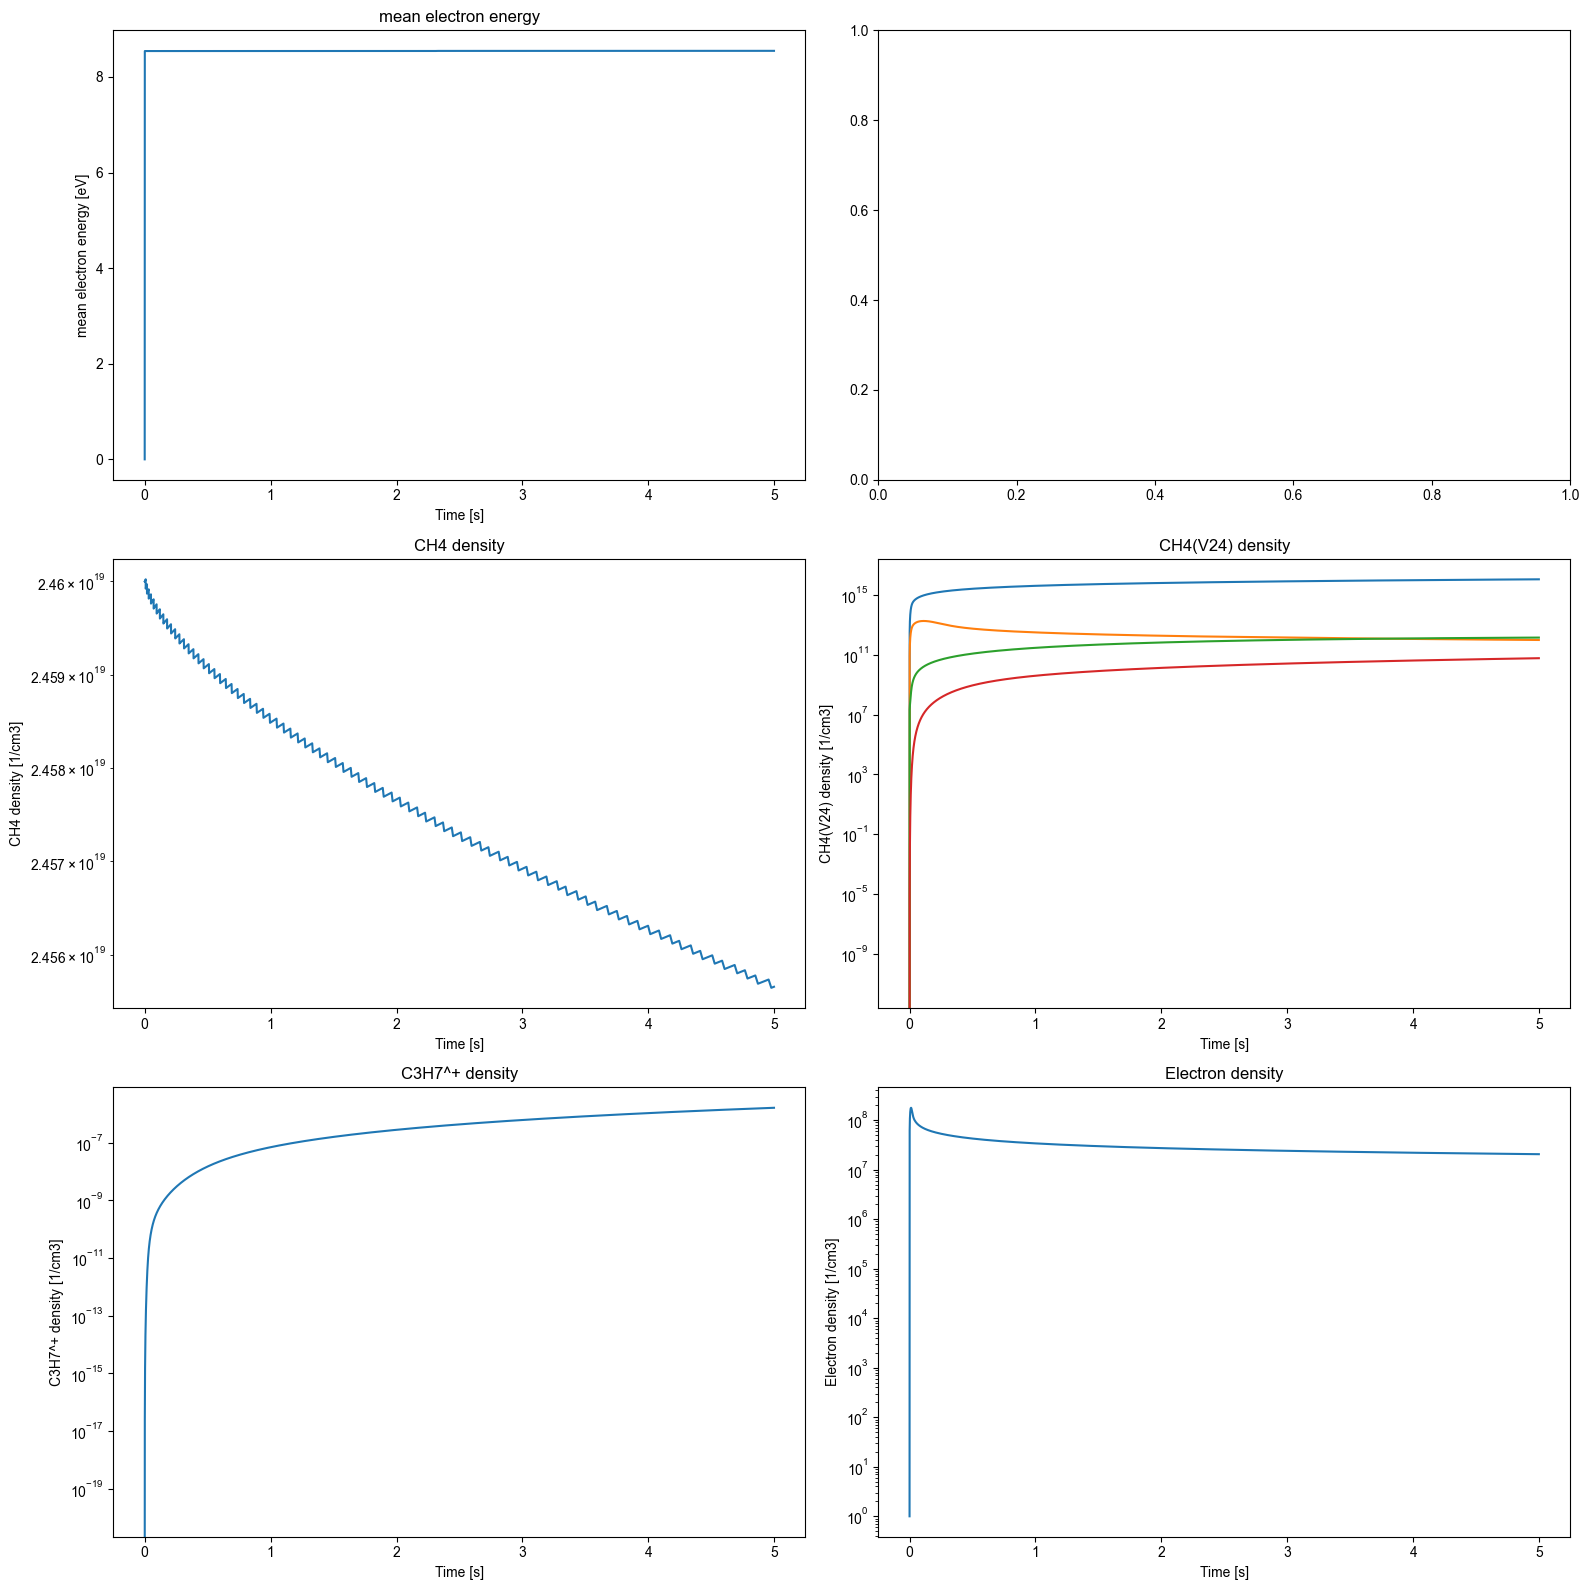

In [13]:
fig, axs = plt.subplots(3,2,figsize=(16,16))

axs[0,0].plot(df_cd['Time [s]'],3/2*df_cd['Electron temperature [K]'] / const.e * const.k)
axs[0,0].set_xlabel('Time [s]')
axs[0,0].set_ylabel('mean electron energy [eV]')
axs[0,0].set_title('mean electron energy')


axs[1,0].plot(df_sp['Time [s]'],df_sp['CH4']+df_sp['CH4(V13)']+df_sp['CH4(V24)'])
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel('Time [s]')
axs[1,0].set_ylabel('CH4 density [1/cm3]')
axs[1,0].set_title('CH4 density')

axs[1,1].plot(df_sp['Time [s]'],df_sp['C2H6'] + df_sp['C2H6(V13)'] + df_sp['C2H6(V24)'] )
axs[1,1].plot(df_sp['Time [s]'],df_sp['C2H4'] + df_sp['C2H4(V1)'] + df_sp['C2H4(V2)'])
axs[1,1].plot(df_sp['Time [s]'],df_sp['C2H2'] + df_sp['C2H2(V5)'] + df_sp['C2H2(V2)'] + df_sp['C2H2(V13)'])
axs[1,1].plot(df_sp['Time [s]'],df_sp['C3H8'] + df_sp['C3H8(V1)'] + df_sp['C3H8(V2)'])
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel('Time [s]')
axs[1,1].set_ylabel('CH4(V24) density [1/cm3]')
axs[1,1].set_title('CH4(V24) density')

axs[2,0].plot(df_sp['Time [s]'],df_sp[species[2]])
axs[2,0].set_yscale('log')
axs[2,0].set_xlabel('Time [s]')
axs[2,0].set_ylabel(species[2]+' density [1/cm3]')
axs[2,0].set_title(species[2]+' density')

axs[2,1].plot(df_sp['Time [s]'],df_sp['E'])
axs[2,1].set_yscale('log')
axs[2,1].set_xlabel('Time [s]')
axs[2,1].set_ylabel('Electron density [1/cm3]')
axs[2,1].set_title('Electron density')

plt.tight_layout()
plt.show()

In [14]:
for i in range(len(species)):
    print(f'{species[i]}: {df_sp[species[i]].iloc[-1]}')

E: 20589000.0
C2H4(V2): 1156400000.0
C3H7^+: 1.6186e-06
C2H5^+: 0.63316
C3H6^+: 3.527e-07
C2H: 4.5925e-15
C2H3^+: 0.43123
CH: 56952000.0
C2H2(V2): 189940000.0
CH4^+: 2788.1
H2: 1.3638e+16
H3^+: 0.00059613
H: 1.6096e+16
C3H8^+: 2.7764e-06
C3H6(V): 1352900.0
CH3^+: 1557.6
C2H2^+: 0.25703
C3H7: 20048000.0
C3H4^+: 1.3666e-07
C3H5: 261800000.0
C2H2: 1439800000000.0
CH4(V24): 2.0124e+16
CH3: 2.054e+16
C3H8(V2): 34383000.0
CH4(V13): 1.8462e+16
C3H5^+: 7.4128e-07
H2^+: 0.56122
CH2: 27277000000.0
C2H3: 1322800000.0
H^+: 1.8421e-08
C4H9: 1089600.0
C3H8(V1): 44510000.0
C2H4(V1): 4006900000.0
C2H5: 34935000000.0
C3H4: 10690000.0
C2H^+: 0.0
C3H6: 784360000.0
C2H2(V13): 118040000.0
C2H6(V24): 7048700000000.0
C2H6^+: 0.56015
C2H6(V13): 6566200000000.0
C2H4: 990010000000.0
C2H6: 1.1396e+16
CH^+: 16.016
C3H8: 60063000000.0
C2H4^+: 1.6942
CH5^+: 20581000.0
C5H12: 139200.0
C4H9H: 797520000.0
CH2^+: 3595.7
CH4: 2.4518e+19
C2H2(V5): 548510000.0
